In [1]:
import pandas as pd
import numpy as np
path_nsproperties_apt= "nsproperties_apt_no_pix_exclusive_is_available_list_on_web.csv"
df= pd.read_csv(path_nsproperties_apt, index_col = False)
df.columns

Index(['id', 'address', 'display_address', 'gAddress', 'geo_accuracy',
       'street_address', 'house_num', 'street', 'city_id', 'state_id',
       'zipcode', 'country_id', 'apt_num', 'bldg_id', 'is_rental', 'is_no_fee',
       'is_furnished', 'is_commercial', 'listing_type', 'is_available',
       'list_on_web', 'is_approved', 'available_on', 'status', 'headline',
       'slug', 'description', 'pets', 'currency_id', 'rent',
       'security_deposit', 'min_lease_term', 'max_lease_term', 'price',
       'common_charges', 'real_estate_tax', 'taxes', 'maintenance',
       'financing_allowed', 'show_price', 'commission', 'assessment',
       'assessment_amount', 'assessment_date', 'assessment_expiration_date',
       'assessment_pay_period', 'is_new_development', 'max_price',
       'min_unit_area', 'max_unit_area', 'max_num_bedrooms', 'area_units',
       'area', 'num_rooms', 'num_bedrooms', 'num_bathrooms', 'floor',
       'lot_size_units', 'lot_size', 'exterior_sf', 'block', 'tax_lot',

In [2]:
from shapely import wkb

def func_lat(geom): 
    try:
        return wkb.loads(geom, hex=True).x
    except:
        return np.nan
    
def func_long(geom): 
    try:
        return wkb.loads(geom, hex=True).y
    except:
        return np.nan
    
df['lat']= df['geo'].apply(func_lat) 
df['long']= df['geo'].apply(func_long)
#df.head()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

/Users/hh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 3 Axes>

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [4]:
def plot_col_bar(feature, num_bar=5):
    df[feature].value_counts().nlargest(num_bar).plot(kind='bar', title=feature)

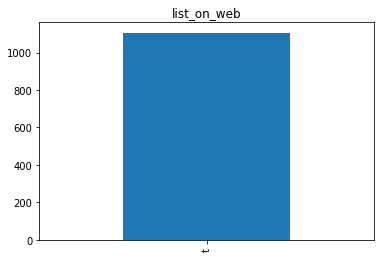

In [45]:
plot_col_bar('list_on_web', 5)

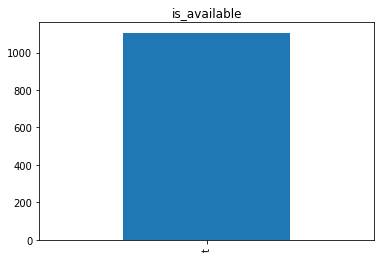

In [46]:
plot_col_bar('is_available', 5)

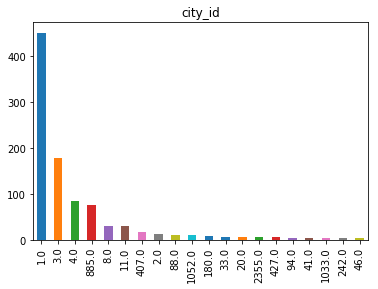

In [5]:
plot_col_bar('city_id', 20)

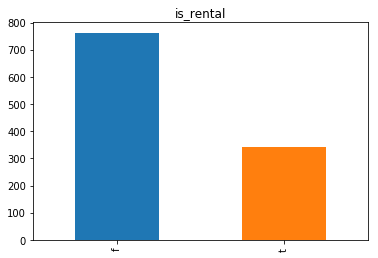

In [57]:
plot_col_bar('is_rental', 5)

/Users/hh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count    7.470000e+02
mean     2.420888e+06
std      3.175159e+06
min      0.000000e+00
25%      8.490000e+05
50%      1.350000e+06
75%      2.500000e+06
max      2.350000e+07
Name: price, dtype: float64

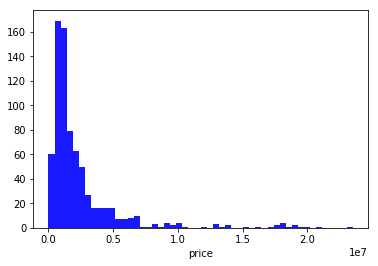

In [60]:
df_sale= df[ df['is_rental']=='f']
df_sale= df_sale[ df_sale['price'] < 25000000 ]
df_sale= df_sale['price'].dropna()
sns.distplot(df_sale, kde = False, color = 'b', hist_kws={'alpha': 0.9})
df_sale.describe()

/Users/hh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count      326.000000
mean      6292.493865
std       6852.160824
min          0.000000
25%       2756.250000
50%       3950.000000
75%       6033.750000
max      40000.000000
Name: rent, dtype: float64

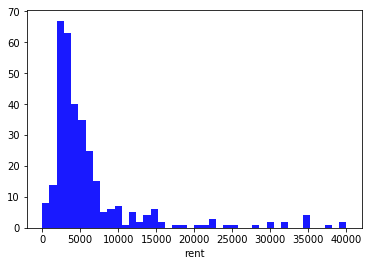

In [63]:
df_rent= df[ df['is_rental']=='t']
df_rent= df_rent[ df_rent['rent'] < 50000 ]
df_rent= df_rent['rent'].dropna()
sns.distplot(df_rent, kde = False, color = 'b', hist_kws={'alpha': 0.9})
df_rent.describe()

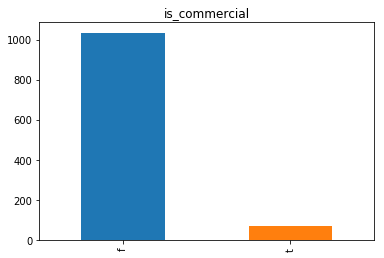

In [28]:
plot_col_bar('is_commercial', 5)

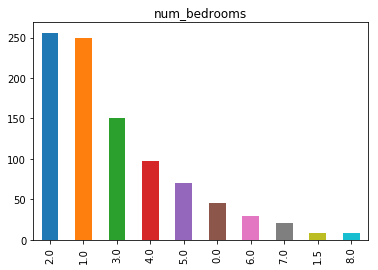

In [32]:
plot_col_bar('num_bedrooms',10)

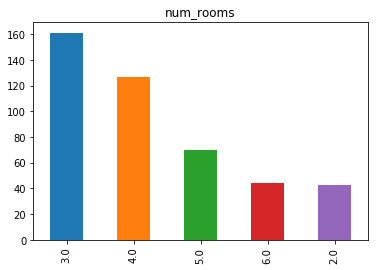

In [34]:
plot_col_bar('num_rooms')

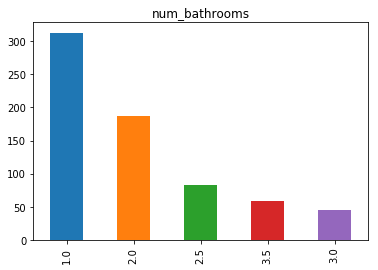

In [35]:
plot_col_bar('num_bathrooms')

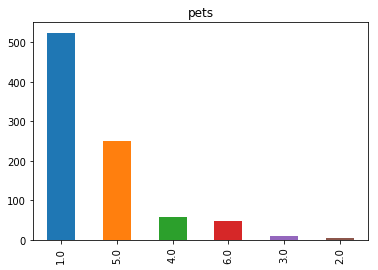

In [36]:
#1: Pets Allowed 2: Pets Unknown 3: Pets No 4: Pets Case By Case
plot_col_bar('pets', 10)

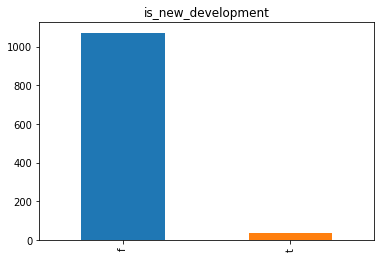

In [42]:
plot_col_bar('is_new_development', 10)

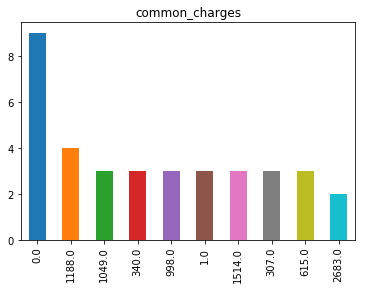

In [43]:
plot_col_bar('common_charges', 10)

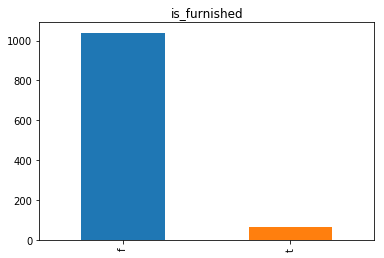

In [44]:
plot_col_bar('is_furnished', 5)

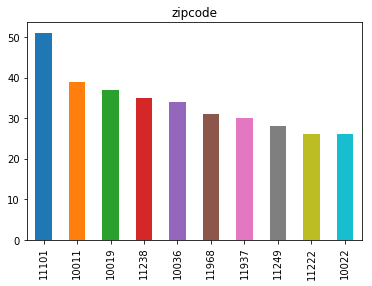

In [64]:
plot_col_bar('zipcode', 10)

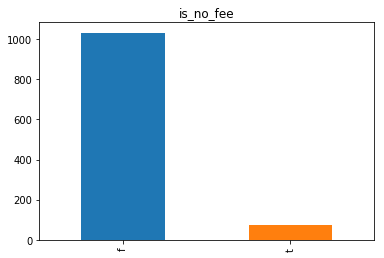

In [9]:
plot_col_bar('is_no_fee', 5)

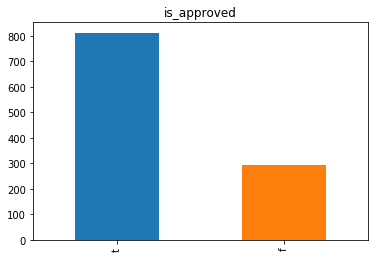

In [13]:
plot_col_bar('is_approved', 5)

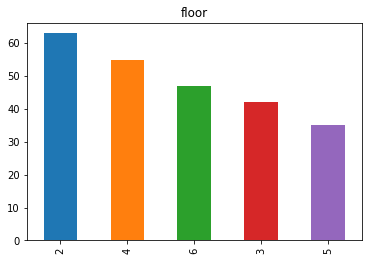

In [24]:
plot_col_bar('floor', 5)

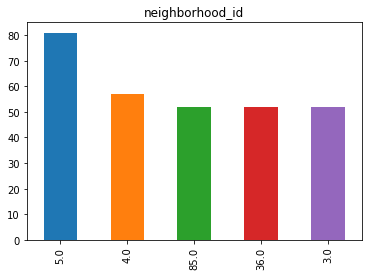

In [25]:
plot_col_bar('neighborhood_id', 5)

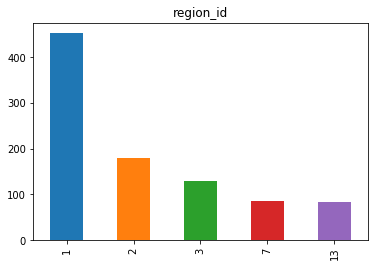

In [26]:
plot_col_bar('region_id', 5)

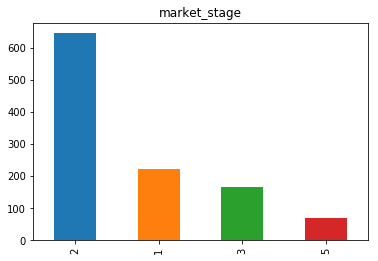

In [27]:
plot_col_bar('market_stage', 5)